In [3]:
import pandas as pd
 
file_path = 'otog_data.csv'
data = pd.read_csv(file_path)
 
print("Original Data: \n")
print(data.head())
 
data_cleaned = data.drop(columns=['CID', 'TID'])
 
 
data_cleaned.fillna(0, inplace=True)
 
data_cleaned['Discount Amount (INR)'] = data_cleaned['Discount Amount (INR)'].astype(float)
data_cleaned['Gender'] = data_cleaned['Gender'].str.lower()
data_cleaned = data_cleaned[data_cleaned['Net Amount'] >= 0]
data_cleaned = data_cleaned.loc[:, ~data_cleaned.columns.duplicated()]
data_cleaned.rename(columns={'Discount Amount (INR)': 'Discount_Amount (PHP)'}, inplace=True)
 
exchange_rate = 0.67
data_cleaned['Discount_Amount (PHP)'] = data_cleaned['Discount_Amount (PHP)'] * exchange_rate
data_cleaned['Gross Amount'] = data_cleaned['Gross Amount'] * exchange_rate
data_cleaned['Net Amount'] = data_cleaned['Net Amount'] * exchange_rate
 
 
print("\n---------------------------------------------------------------------------------")
print("\nCleaned Data: \n")
print(data_cleaned.head())
 
 
print("\nDataFrame Info: ")
print(data_cleaned.info())
 
print("\nDescriptive Statistics:")
print(data_cleaned.describe(include='all'))
 

Original Data: 

      CID         TID  Gender     Age Group        Purchase Date  \
0  943146  5876328741  Female         25-45  30/08/2023 20:27:08   
1  180079  1018503182    Male         25-45  23/02/2024 09:33:46   
2  337580  3814082218   Other  60 and above  06/03/2022 09:09:50   
3  180333  1395204173   Other  60 and above  04/11/2020 04:41:57   
4  447553  8009390577    Male         18-25  31/05/2022 17:00:32   

   Product Category Discount Availed    Discount Name  Discount Amount (INR)  \
0       Electronics              Yes        FESTIVE50                  64.30   
1       Electronics              Yes  SEASONALOFFER21                 175.19   
2          Clothing              Yes  SEASONALOFFER21                 211.54   
3  Sports & Fitness               No              NaN                   0.00   
4  Sports & Fitness              Yes         WELCOME5                 439.92   

   Gross Amount   Net Amount Purchase Method   Location  
0    725.304000   661.004000     Cr

--------------------Net Amount Statistics--------------------
Mean (Net Amount): 1949.4345994209418
Median (Net Amount): 1905.3328680000002
Mode (Net Amount): 196.93310000000002
Standard Deviation (Net Amount): 1143.2120436868197
Variance (Net Amount): 1306933.7768305948
Min (Net Amount): 0.422099999999997
Max (Net Amount): 5624.533152
Range (Net Amount): 5624.111052

Percentiles (Net Amount): 
0.25     985.977762
0.50    1905.332868
0.75    2832.797646
Name: Net Amount, dtype: float64


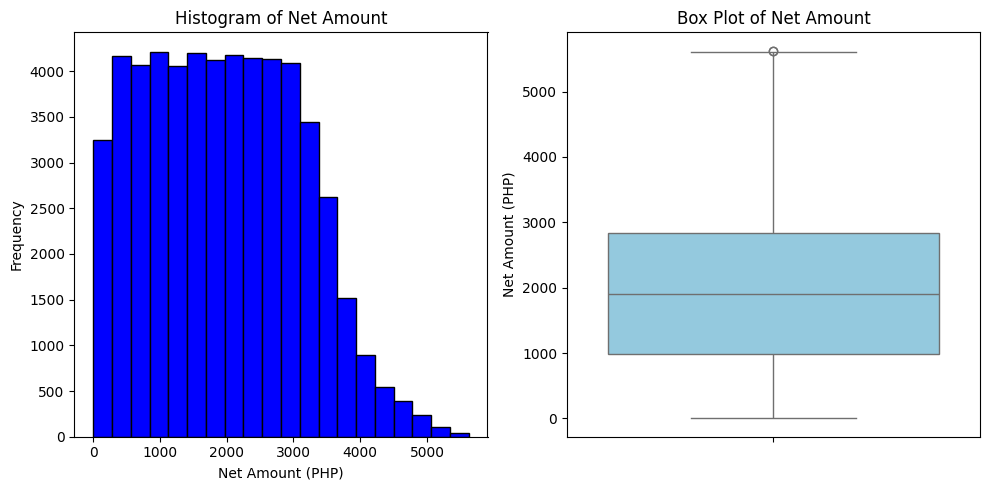

--------------------Discount Availed Statistics--------------------

Counts for Discount Availed: 

Discount Availed
No     27585
Yes    26802
Name: count, dtype: int64

Proportions for Discount Availed (%): 

Discount Availed
No     50.719841
Yes    49.280159
Name: proportion, dtype: float64


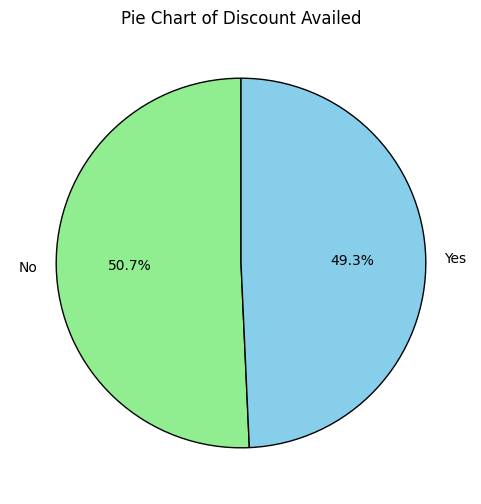

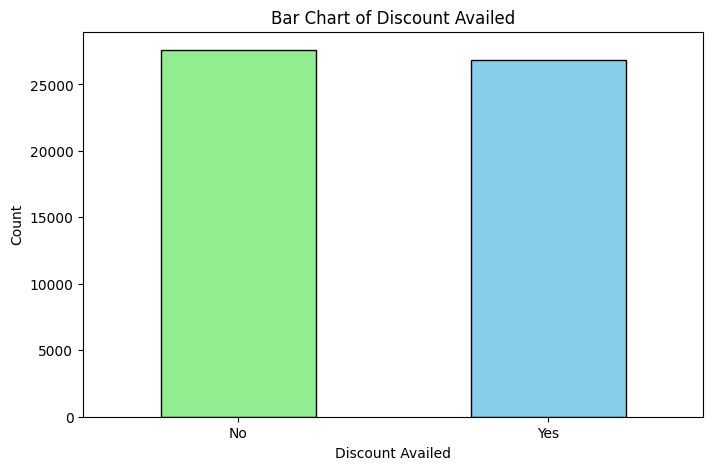


Scipy.stats.describe for Net Amount:
DescribeResult(nobs=54387, minmax=(0.422099999999997, 5624.533152), mean=1949.4345994209418, variance=1306933.7768305948, skewness=0.25586522728176236, kurtosis=-0.7239575000013225)


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

file_path = 'otog_data.csv'
data = pd.read_csv(file_path)

# Net amount analysis part
print("--------------------Net Amount Statistics--------------------")
data_cleaned = data.drop(columns=['CID', 'TID'])
data_cleaned.fillna(0, inplace=True)
data_cleaned = data_cleaned[data_cleaned['Net Amount'] >= 0]

exchange_rate = 0.67
data_cleaned['Net Amount'] = data_cleaned['Net Amount'] * exchange_rate

mean_net = data_cleaned['Net Amount'].mean()
median_net = data_cleaned['Net Amount'].median()
mode_net = data_cleaned['Net Amount'].mode()[0]

print(f"Mean (Net Amount): {mean_net}")
print(f"Median (Net Amount): {median_net}")
print(f"Mode (Net Amount): {mode_net}")

std_net = data_cleaned['Net Amount'].std()
variance_net = data_cleaned['Net Amount'].var()

print(f"Standard Deviation (Net Amount): {std_net}")
print(f"Variance (Net Amount): {variance_net}")

min_net = data_cleaned['Net Amount'].min()
max_net = data_cleaned['Net Amount'].max()
range_net = max_net - min_net

print(f"Min (Net Amount): {min_net}")
print(f"Max (Net Amount): {max_net}")
print(f"Range (Net Amount): {range_net}")

percentiles_net = data_cleaned['Net Amount'].quantile([0.25, 0.5, 0.75])
print(f"\nPercentiles (Net Amount): \n{percentiles_net}")

plt.figure(figsize=(10, 5))

# Histogram
plt.subplot(1, 2, 1)
plt.hist(data_cleaned['Net Amount'], bins=20, color='blue', edgecolor='black')
plt.title('Histogram of Net Amount')
plt.xlabel('Net Amount (PHP)')
plt.ylabel('Frequency')

# Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(y=data_cleaned['Net Amount'], color='skyblue')
plt.title('Box Plot of Net Amount')
plt.ylabel('Net Amount (PHP)')

plt.tight_layout()
plt.show()

# Discount Availed Analysis
print("--------------------Discount Availed Statistics--------------------")
print("\nCounts for Discount Availed: \n")
discount_counts = data_cleaned['Discount Availed'].value_counts()
print(discount_counts)

discount_proportions = data_cleaned['Discount Availed'].value_counts(normalize=True) * 100
print("\nProportions for Discount Availed (%): \n")
print(discount_proportions)

# Pie Chart for Discount Availed
plt.figure(figsize=(6, 6))
discount_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'skyblue'], wedgeprops={'edgecolor': 'black'})
plt.title('Pie Chart of Discount Availed')
plt.ylabel('') 
plt.show()

# Bar Chart for Discount Availed
plt.figure(figsize=(8, 5))
discount_counts.plot(kind='bar', color=['lightgreen', 'skyblue'], edgecolor='black')
plt.title('Bar Chart of Discount Availed')
plt.xlabel('Discount Availed')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

print("\nScipy.stats.describe for Net Amount:")
net_stats = stats.describe(data_cleaned['Net Amount'])
print(net_stats)


Total and Average Net Amount by Age Group:
      Age Group           sum         mean  count
1         25-45  4.285247e+07  1966.702178  21789
0         18-25  3.137323e+07  1932.325226  16236
2         45-60  2.123718e+07  1934.697883  10977
4      under 18  5.367421e+06  1965.368254   2731
3  60 and above  5.193594e+06  1956.893021   2654


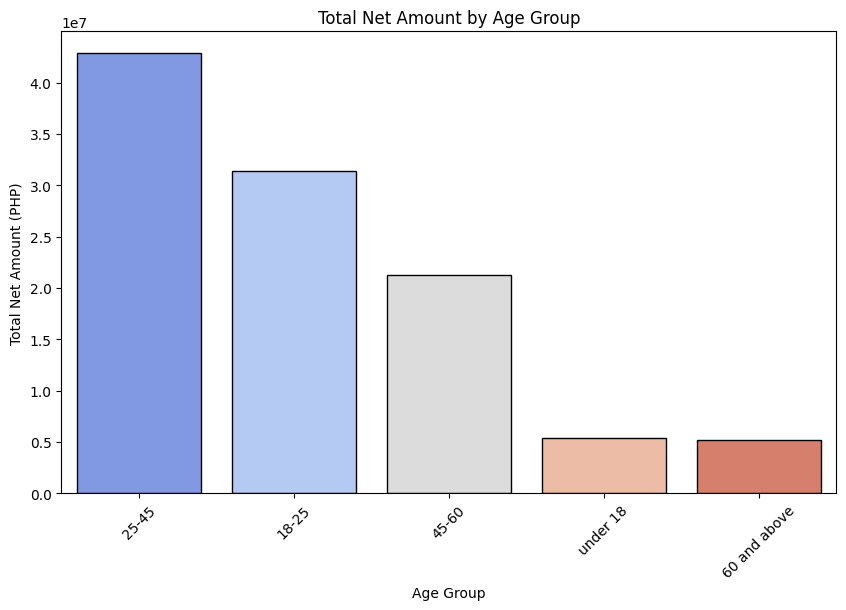

In [11]:
# Relationship sa age and their spendings
age_group_spending = data_cleaned.groupby('Age Group')['Net Amount'].agg(['sum', 'mean', 'count']).reset_index()

age_group_spending.sort_values(by='sum', ascending=False, inplace=True)

print("Total and Average Net Amount by Age Group:")
print(age_group_spending)

plt.figure(figsize=(10, 6))

# bar plot for total ni nga spending per age group
sns.barplot(x='Age Group', y='sum', hue='Age Group', data=age_group_spending, palette='coolwarm', edgecolor='black', legend=False)
plt.title('Total Net Amount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Net Amount (PHP)')
plt.xticks(rotation=45)
plt.show()



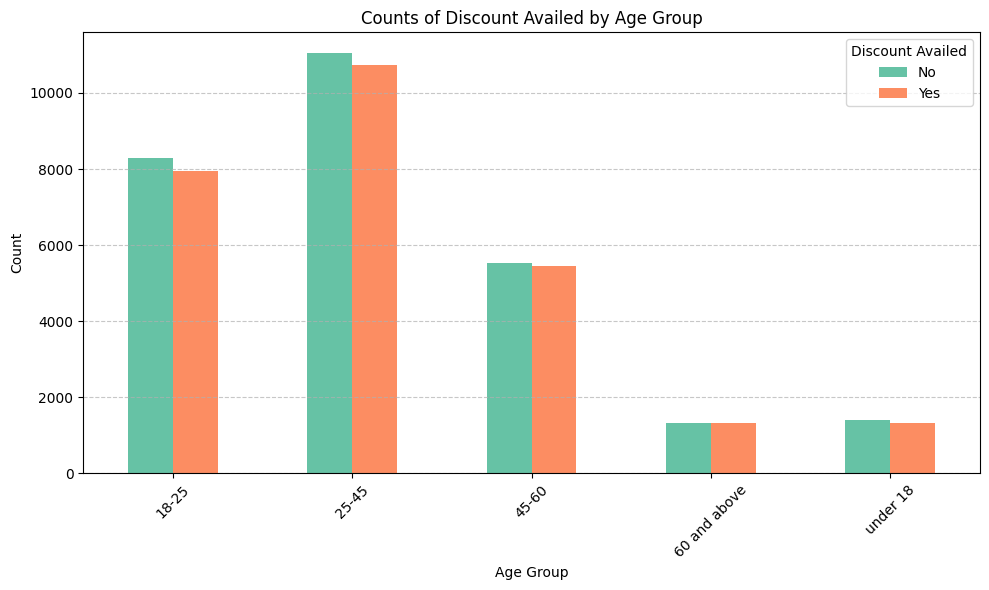


Average Net Amount by Age Group and Discount Availed:
Discount Availed           No          Yes
Age Group                                 
18-25             2008.459809  1853.031531
25-45             2033.285997  1898.290665
45-60             2000.011118  1868.582449
60 and above      2039.459508  1874.077277
under 18          2023.426938  1903.488764


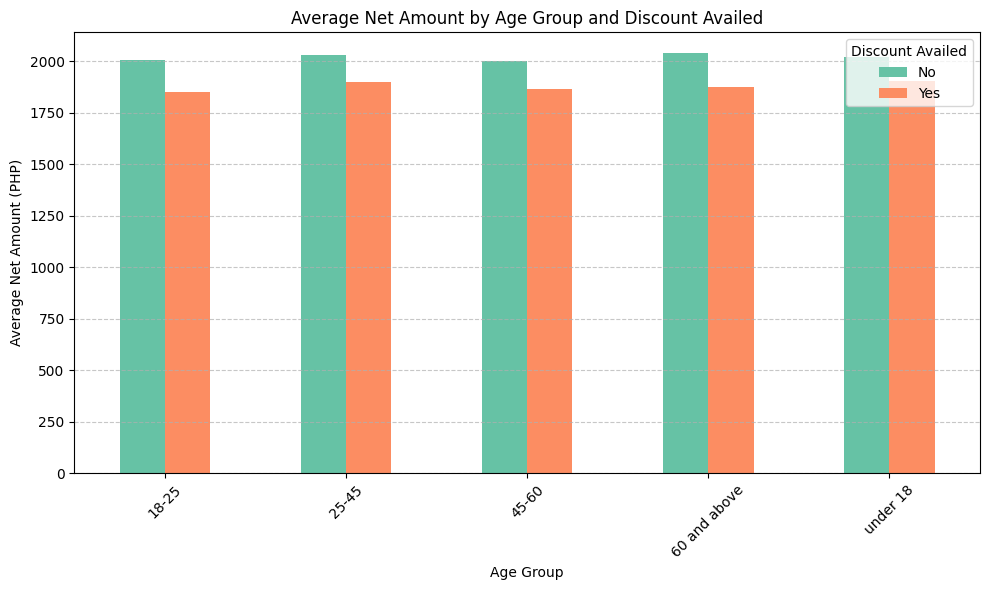

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# finsing the relationship between age groupa and discount availed
colors = sns.color_palette("Set2")


age_discount = data_cleaned.groupby(['Age Group', 'Discount Availed']).size().unstack(fill_value=0)

# counts of discount availed sa age group
age_discount.plot(kind='bar', figsize=(10, 6), color=colors)
plt.title('Counts of Discount Availed by Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Discount Availed', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# average net Amount by age group and discount availed
age_group_discount_spending = data_cleaned.groupby(['Age Group', 'Discount Availed'])['Net Amount'].mean().unstack()

print("\nAverage Net Amount by Age Group and Discount Availed:")
print(age_group_discount_spending)

#average net amount by age group and discount availed 
age_group_discount_spending.plot(kind='bar', figsize=(10, 6), color=colors)
plt.title('Average Net Amount by Age Group and Discount Availed')
plt.ylabel('Average Net Amount (PHP)')
plt.xticks(rotation=45)
plt.legend(title='Discount Availed', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

